# funkyAD package tutorial

In [19]:
# import other dependencies for the tutorial 
import numpy as np
import matplotlib.pyplot as plt

## Importing funkyAD

funkyAD can be imported from pip using the following command:

pip install -i https://test.pypi.org/simple/ funkyAD-funkyADers==0.0.1

In [77]:
# this isn't working yet but will be how we want to read things in
from funkyAD import base

In [76]:
# for now we will just read the packages in directly 
# from base import AD

## Basic functionality of funkyAD

In [78]:
adobj = AD(lambda x,y: x + y)
print(vars(adobj))
print(adobj.grad(3,2))

{'f': <function <lambda> at 0x11bbcdb70>, 'seed': None, 'n': None, 'm': None}
[[1. 1.]]


In [84]:
# show basic functionality of funkyAD
def f(x):
    return x**3

print(AD(f).grad(2))
print(AD(f).grad(3))

[[12.]]
[[27.]]


In [80]:
def f(x,y):
    return x+y

print(AD(f).grad(3,5))

[[1. 1.]]


## Examples

### Example 1: Using funkyAD for Newton's method

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In [81]:
# instantiate an automatic differentiation object to be used in the forward mode.
def newtonroot(f, x):
    # find f(x) and f'(x) jacobian using funkyAD package 
    fx = f(x)
    dfx = AD(f).grad(x) # alternative this can be written grad(f)(x)
    x_next = x - fx/dfx 
    return x_next 

def get_root(f,x_start):
    delta = 10
    path = [x_start]
    x = x_start
    while delta > 1e-6:
        new_x = newtonroot(f,x) 
        path.append(new_x)
        delta = abs(x - new_x)
        x = new_x 
    return(x, path)

In [82]:
# root method for scalar function (e.g. y = f(x))
def f(x):
    return x**2+x 

# try 1 initialization
zero1, path1 = get_root(f, 1)

# try a different initialization 
zero2, path2  = get_root(f, -2)

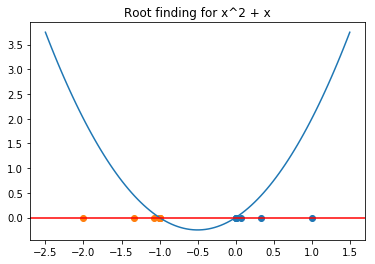

In [83]:
xs = np.linspace(-2.5, 1.5, 100)
path1_ys = [0]*len(path1)
path2_ys = [0]*len(path2)


plt.plot(xs, f(xs))
plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(path1, path1_ys)
plt.scatter(path2, path2_ys)
plt.title('Root finding for x^2 + x')
plt.show()